In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('/Users/wastechs/Documents/git-repos/energy-efficiency')
from lib.util.helper import query_table
from lib.visualizer import hourly_profile_heatmap
import seaborn as sns
import plotly.express as px
from statsmodels.graphics.tsaplots import plot_acf

In [13]:
df = query_table(table='soldering_oven_30T')

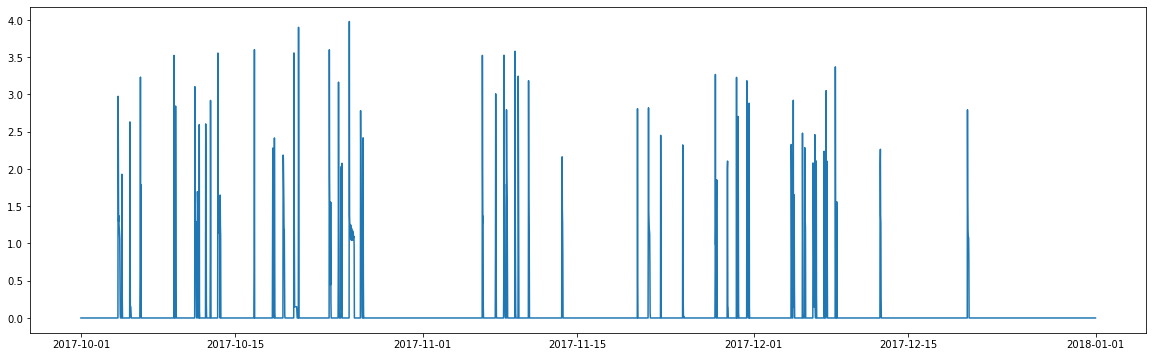

In [14]:
plt.figure(figsize=(20, 6))
plt.plot(df.index, df.kw)
plt.show()

In [ ]:
hourly_profile_heatmap(machine='soldering_oven')

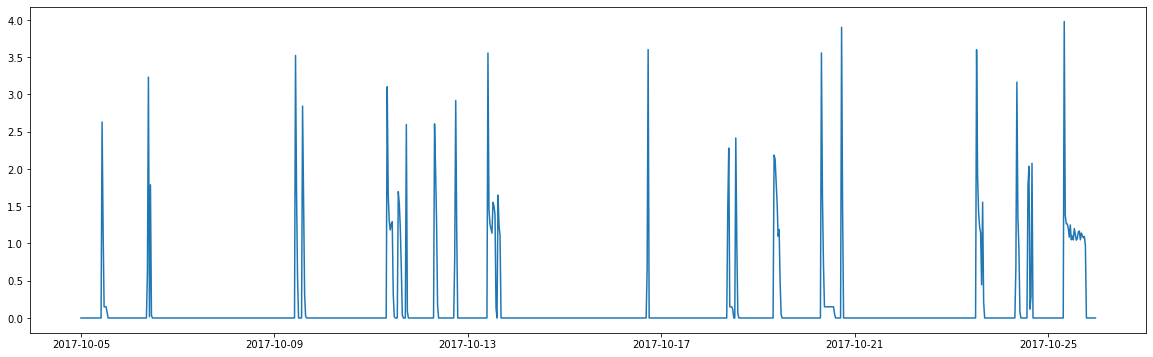

In [19]:
df = df[(df.index >= '2017-10-05') & (df.index < '2017-10-26')]
#time_int_range = np.arange(0, df.shape[0]*30, 30)
#df['t_int'] = time_int_range
#df['t_norm'] = (df['t_int'] - df['t_int'].min()) / (df['t_int'].max() - df['t_int'].min())

plt.figure(figsize=(20, 6))
plt.plot(df.index, df.kw)
plt.show()

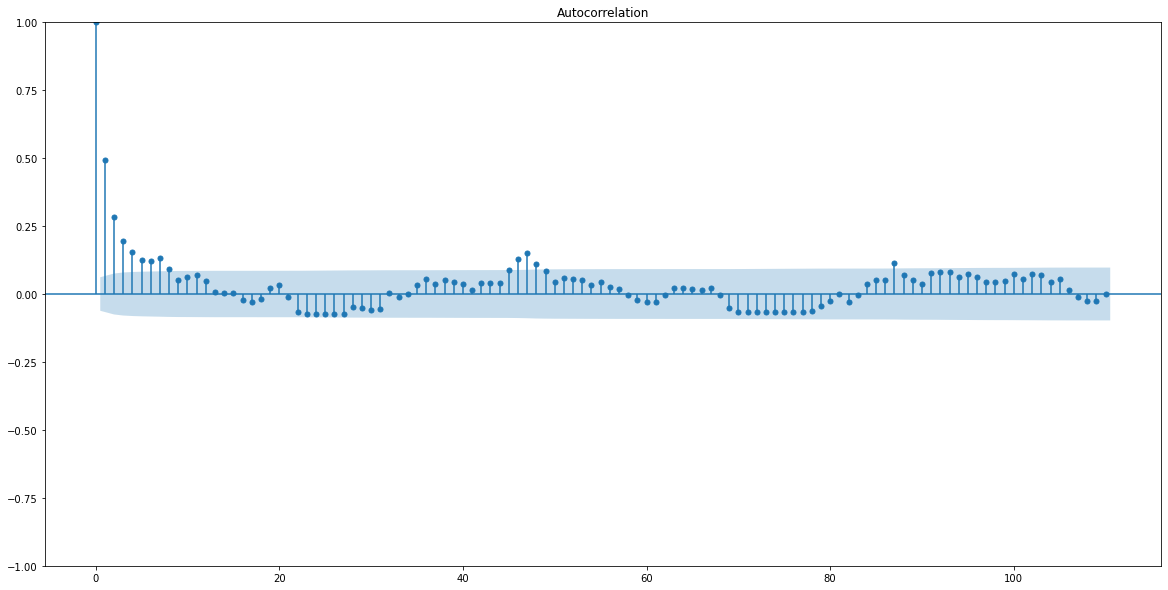

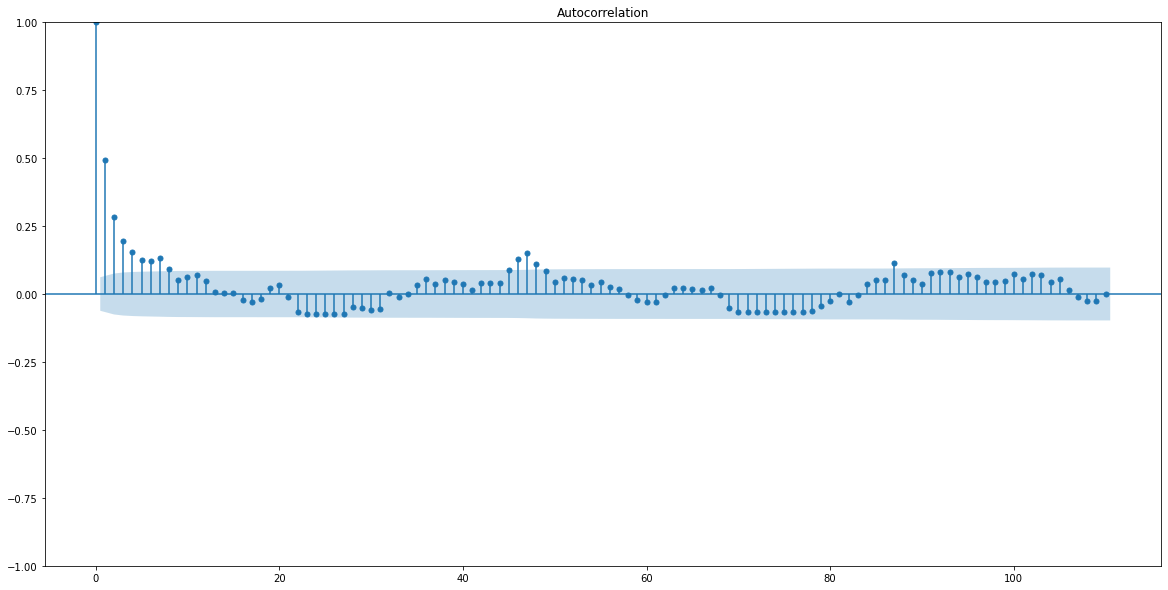

In [20]:
fig, ax = plt.subplots(figsize=(20, 10))
plot_acf(df.kw.values.squeeze(), lags=110, ax=ax)